# 1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH

## 1.1 Biến đổi cường độ ảnh (Image inverse transformation)

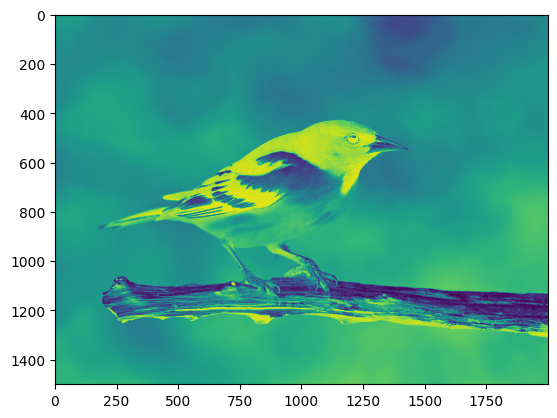

In [29]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im_1 = np.asarray(img)
#inversion operation
im_2 = 255 - im_1
#convert image 2 from ndarray to image
new_img = Image.fromarray (im_2)
img.show ()
plt.imshow (new_img)
plt.show ()

## 1.2. Thay đổi chất lượng ảnh với Power law(Gamma-Correction)

C:\Users\HP\AppData\Local\Temp\ipykernel_8708\4104919388.py:20: RuntimeWarning: divide by zero encountered in log
  b2 = np.log (b3) * gamma


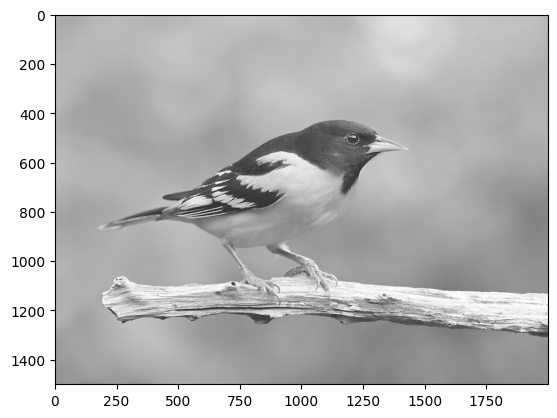

In [20]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im_1 = np.asarray(img)
#init gamma
gamma = 0.5
#convert ndarray from int to float
b1 = im_1.astype (float)
#find maximum value in bl
b2 = np.max (b1)
#b3 is normalized
b3 = b1/b2
#b2 gamma correction exponent is computed
b2 = np.log (b3) * gamma
#gamma correction is computed
c= np.exp (b2) * 255.0
#cl is converted to type int
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show ()
d.show ()
plt.imshow(d)
plt.show ()

###  Thay đổi giá trị gamma = 5

C:\Users\HP\AppData\Local\Temp\ipykernel_22328\86781341.py:20: RuntimeWarning: divide by zero encountered in log
  b2 = np.log (b3) * gamma


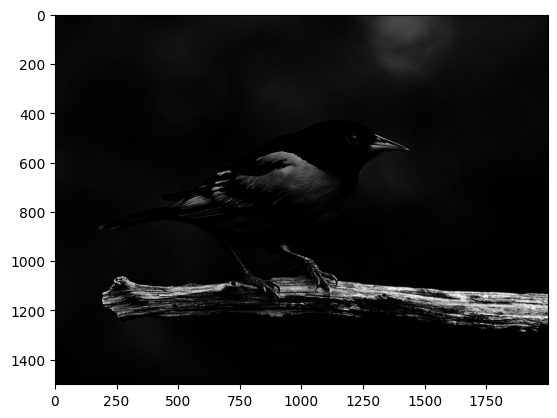

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im_1 = np.asarray(img)
#init gamma
gamma = 5
#convert ndarray from int to float
b1 = im_1.astype (float)
#find maximum value in bl
b2 = np.max (b1)
#b3 is normalized
b3 = b1/b2
#b2 gamma correction exponent is computed
b2 = np.log (b3) * gamma
#gamma correction is computed
c= np.exp (b2) * 255.0
#cl is converted to type int
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show ()
d.show ()
plt.imshow(d)
plt.show ()

## 1.3 Thay đổi cường độ điểm ảnh với Log Transformation

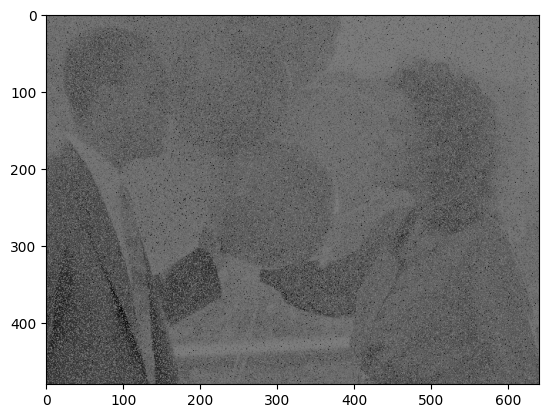

In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('balloons_noisy.png').convert('L')
#convert image 1 into an ndarray
im_1 = np.asarray(img)
#convert ndarray from int to float
b1 = im_1.astype (float)
#find maximum value in bl
b2 = np.max (b1)
#performing the log transformation
c = (128.0 * np.log(1 + b1))/np.log (1 + b2)
#cl is converted to type int
c1 = c.astype (int)
d = Image.fromarray (c1)
img.show ()
d.show ()
plt.imshow (d)
plt.show ()

## 1.4 Histogram equalization

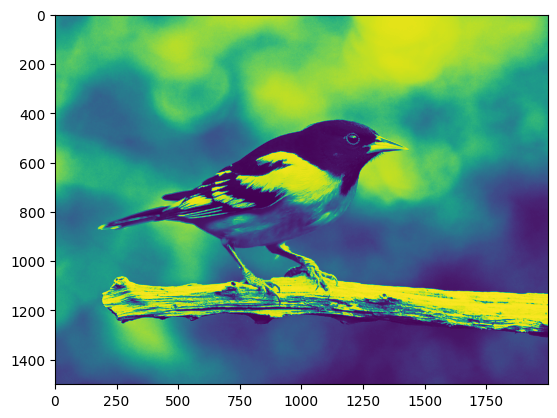

In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
#convert 2D ndarray from 1D array
b1 = im1.flatten()
#histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])
#cumulative distribution function is computed
cdf = hist.cumsum()
#places where cdf=0 is masked or ignored and
# rest is stored in cdf m
cdf_m = np.ma.masked_equal (cdf, 0)
#histogram equalization is performed
num_cdf_m = (cdf_m -cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min ())
cdf_m = num_cdf_m/den_cdf_m
# the masked places in cdf m are now O
cdf = np.ma.filled (cdf_m, 0).astype('uint8')
# cdf values are assigned in the flattened array
im2 = cdf[b1]
# im2 is 1D so we use reshape command to
#make it into 2D
im3 = np.reshape (im2, im1.shape)
#converting im3 to an image
im4 = Image.fromarray (im3)
img.show ()
im4.show ()
plt.imshow (im4)
plt.show ()


## 1.5 Thay đổi ảnh với Contrast Stretching

0 255


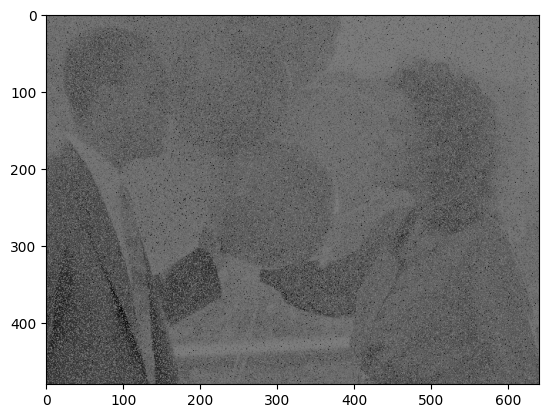

In [16]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('balloons_noisy.png').convert ('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# finding the maximum and minimum pixel values
b = im1.max ()
a = im1.min()
print (a, b)
# converting iml to float
C = im1.astype (float)
# contrast stretching transformation
im2 = 255* (c - a)/(b - a)
#im2 is converted from ndarray to image
im3 = Image.fromarray (im2)
img.show ()
im3.show ()
plt.imshow(im3)
plt.show ()


## 1.6. Biến đổi Fourier

### 1.6.1. Biến đổi ảnh với Fast Fourier

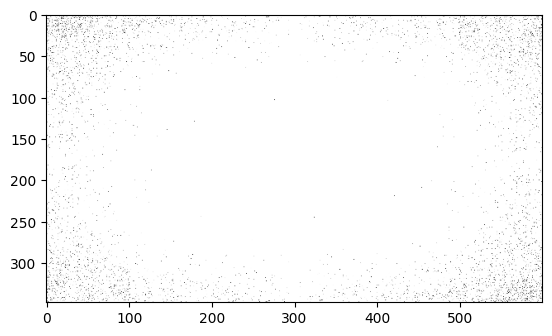

In [21]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('exercise/pagoda.jpg').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray (img)
# performing FFT
c = abs (scipy.fftpack.fft2 (im1))
# shifting the Fourier frequency image
d= scipy.fftpack.fftshift (c)
d = d.astype (float)
#im2 is converted from ndarray to image
im3 = Image.fromarray (d)
img.show ()
im3.show()
plt.imshow (im3)
plt.show ()


### 1.6.2. Lọc ảnh trong miền tần suất

#### Butterworth Lowpass Filter

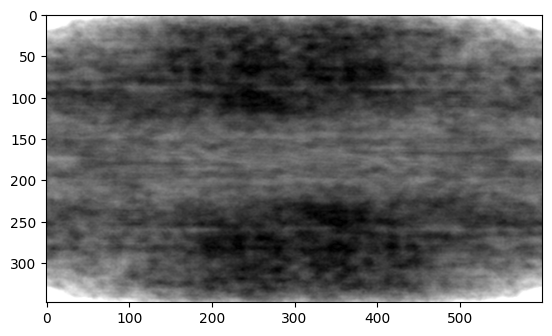

In [30]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('exercise/pagoda.jpg').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# performing FFT
c= abs (scipy.fftpack.fft2 (im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift (c)
#intializing variables for convolution function
M = d.shape [0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H= np.ones((M, N))

center1 = M/2
center2 = N/2
d_0= 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
# defining the convolution function for BLPF
for i in range(1, M):
    for j in range (1, N) :
        r1 = (i - center1) **2 + (j - center2) **2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0) **t1)
#H is converted from ndarray to image
H = H.astype (float)
H = Image.fromarray (H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs (scipy.fftpack.ifft2 (con))
#e is converted from ndarray to image
e = e.astype (float)
im3 = Image.fromarray (e)
img.show ()
im3.show ()
plt.imshow(im3)
plt.show ()

#### Butterworth highpass Filter

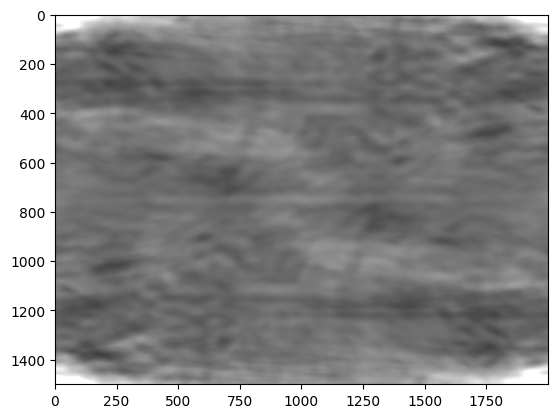

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
#performing FFT
c= abs (scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#intializing variables for convolution function
M = d.shape [0]
N = d.shape[1]
#His defined and values in H are initialized to 1
H= np.ones((M, N))

center1 = M/2
center2 = N/2
d_0  = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
#defining the convolution function for BLPF
for i in range (1, M):
    for j in range (1, N) :
        r1 = (i- center1) **2 + (j - center2) **2
        # euclidean distance from origin is computed
        r = math.sqrt (r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0) **t2)
#H is converted from ndarray to image
H= H.astype (float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs (scipy.fftpack.ifft2(con))
#e is converted from ndarray to image
e = e.astype (float)
im3 = Image.fromarray (e)
img.show()
im3.show ()
plt.imshow(im3)
plt.show ()


# 2. BÀI TẬP

## Bài 1

Chọn phương pháp biến đổi ảnh:
I - Image Inverse
P - Power Law
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


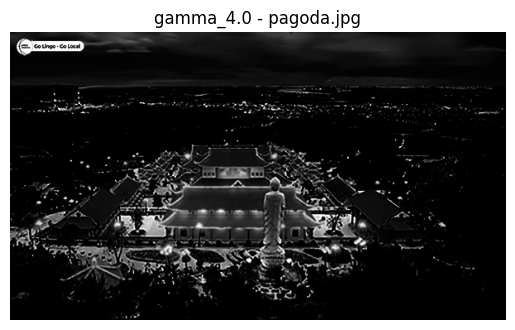

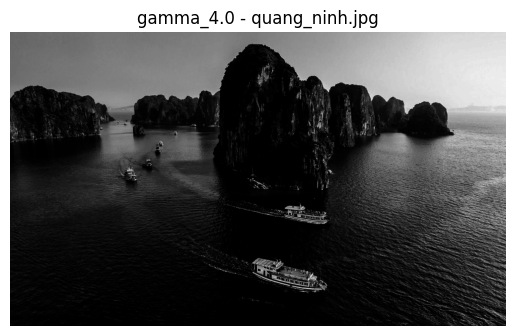

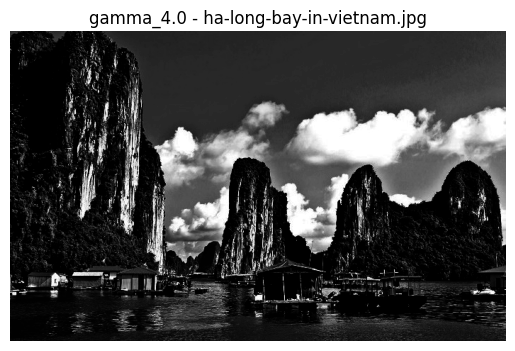

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
input_folder = "exercise"
image_filenames = ["pagoda.jpg", "quang_ninh.jpg", "ha-long-bay-in-vietnam.jpg"]
os.makedirs("output", exist_ok=True)
def read_gray_image(filename):
    path = os.path.join(input_folder, filename)
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)
def image_inverse(img):
    return 255 - img
def power_law(img, gamma=2.2):
    normalized = img / 255.0
    corrected = np.power(normalized, gamma)
    return np.uint8(corrected * 255)
def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img.astype(np.float32))
    return np.uint8(log_img)
def histogram_equalization(img):
    return cv2.equalizeHist(img)
def contrast_stretch(img):
    a, b = np.min(img), np.max(img)
    stretched = ((img - a) * 255 / (b - a)).astype(np.uint8)
    return stretched
def show_and_save(img, original_filename, method_name):
    new_name = f"{method_name}_{original_filename}"
    output_path = os.path.join("output", new_name)
    cv2.imwrite(output_path, img)
    plt.imshow(img, cmap='gray')
    plt.title(f"{method_name} - {original_filename}")
    plt.axis('off')
    plt.show()
print("Chọn phương pháp biến đổi ảnh:")
print("I - Image Inverse")
print("P - Power Law")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")
choice = input("Nhập lựa chọn (I/P/L/H/C): ").strip().upper()
if choice == 'P':
    try:
        gamma_value = float(input("Nhập giá trị gamma (ví dụ: 2.2): "))
    except ValueError:
        print("Giá trị gamma không hợp lệ, dùng mặc định 2.2")
        gamma_value = 2.2
for filename in image_filenames:
    img = read_gray_image(filename)
    if img is None:
        print(f"Lỗi: Không đọc được ảnh {filename}")
        continue
    if choice == 'I':
        result = image_inverse(img)
        show_and_save(result, filename, "inverse")
    elif choice == 'P':
        result = power_law(img, gamma=gamma_value)
        show_and_save(result, filename, f"gamma_{gamma_value}")
    elif choice == 'L':
        result = log_transformation(img)
        show_and_save(result, filename, "log")
    elif choice == 'H':
        result = histogram_equalization(img)
        show_and_save(result, filename, "hist_eq")
    elif choice == 'C':
        result = contrast_stretch(img)
        show_and_save(result, filename, "contrast")
    else:
        print("Lựa chọn không hợp lệ!")
